In [3]:
#!pip install scipy==1.1.0
import matplotlib.pyplot as plt
import os
import cv2
from os.path import join
import numpy as np
from my_imfilter import*
from PIL import Image
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean

' adopted from code by James Hays (GATech)'

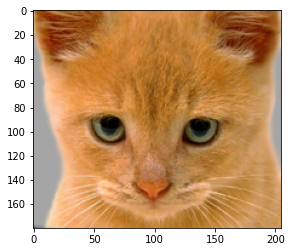

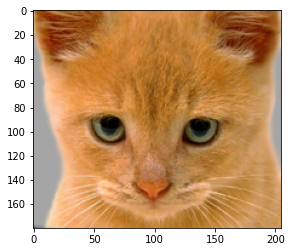

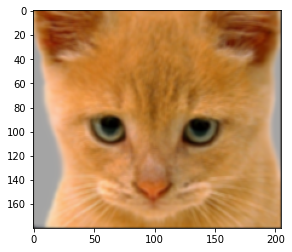

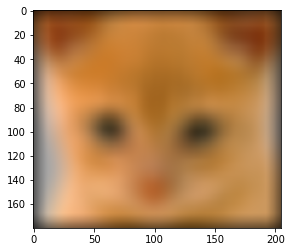

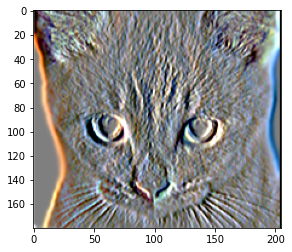

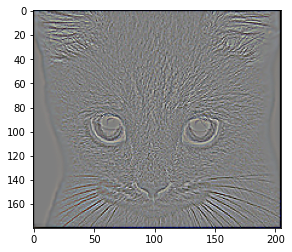

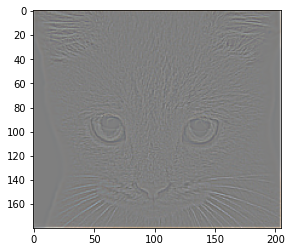

In [10]:
"""
% this script has test cases to help you test my_imfilter() which you will
% write. You should verify that you get reasonable output here before using
% your filtering to construct a hybrid image in proj1.m. The outputs are
% all saved and you can include them in your writeup. You can add calls to
% imfilter() if you want to check that my_imfilter() is doing something
% similar. """


#%% close all figures
plt.close('all')

#%% Setup
test_image = mpimg.imread('cat.bmp');
test_image = resize(test_image, (test_image.shape[0] // 2, test_image.shape[1] // 2), \
                    anti_aliasing=True)#resizing to speed up testing
plt.figure(1)
plt.imshow(test_image)

#%% This filter should do nothing regardless of the padding method you use.
""" Identity filter """

identity_filter = np.asarray([[0,0,0],[0,1,0],[0,0,0]]);
identity_image  = my_imfilter(test_image, identity_filter)

plt.figure(2)
plt.imshow(identity_image);
mpimg.imsave('identity_image.jpg',identity_image);
#

#%% This filter should remove some high frequencies
""" Small blur with a box filter """

blur_filter = np.asarray([[1,1,1],[1,1,1],[1,1,1]]);
blur_filter = blur_filter / np.sum(blur_filter); # making the filter sum to 1
#
blur_image = my_imfilter(test_image, blur_filter);
#
plt.figure(3) 
plt.imshow(blur_image);
mpimg.imsave('blur_image.jpg',blur_image);
#

#%% Large blur
""" This blur would be slow to do directly, so we instead use the fact that
     Gaussian blurs are separable and blur sequentially in each direction. """

large_1d_blur_filter = np.asarray([[0.0246],[0.0276],[0.0307], [0.0337],[0.0367],[0.0396],[0.0422],[0.0446],[0.0467],[0.0483],[0.0496],[0.0503],[0.0506],[0.0503],[0.0496],[0.0483],[0.0467],[0.0446],[0.0422],[0.0396],[0.0367],[0.0337],[0.0307],[0.0276],[0.0246]])# import values from fspecial('Gaussian', [25 1], 10) here
large_blur_image = my_imfilter(test_image, large_1d_blur_filter);
large_1d_blur_filter_transpose=np.transpose(large_1d_blur_filter)
large_blur_image = my_imfilter(large_blur_image, \
                               large_1d_blur_filter_transpose) #implement large_1d_blur_filter_transpose
#
plt.figure(4) 
plt.imshow(large_blur_image);
mpimg.imsave('large_blur_image.jpg', large_blur_image);
#
#% %If you want to see how slow this would be to do naively, try out this
#% %equivalent operation:
#% tic %tic and toc run a timer and then print the elapsted time
#% large_blur_filter = fspecial('Gaussian', [25 25], 10);
#% large_blur_image = my_imfilter(test_image, large_blur_filter);
#% toc 
#
#%% Oriented filter (Sobel Operator)
""" Edge Filter """
sobel_filter = np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]]) #should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter);
#
# 0.5 added because the output image is centered around zero otherwise and mostly black
plt.figure(5)
sobel_image=sobel_image+0.5
sobel_image=np.clip(sobel_image,0,1)
plt.imshow(sobel_image)
mpimg.imsave('sobel_image.jpg',sobel_image)
#
#
#%% High pass filter (Discrete Laplacian)
""" Laplacian Filter """
laplacian_filter = np.asarray([[0,1,0],[1,-4,1],[0,1,0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)
# 0.5 added because the output image is centered around zero otherwise and mostly black
plt.figure(6)
laplacian_image=laplacian_image+0.5
laplacian_image=np.clip(laplacian_image,0,1)
plt.imshow(laplacian_image)
mpimg.imsave('laplacian_image.jpg', laplacian_image)
#
#%% High pass "filter" alternative
""" High pass filter example we saw in class """
high_pass_image = test_image - blur_image #simply subtract the low frequency content
plt.figure(7)
high_pass_image=high_pass_image + 0.5
np.clip(high_pass_image,0,1)
plt.imshow(high_pass_image);
mpimg.imsave('high_pass_image.jpg',high_pass_image)

""" adopted from code by James Hays (GATech)"""